In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from google.colab import files
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from matplotlib.lines import Line2D
import time

Saving data.csv to data.csv


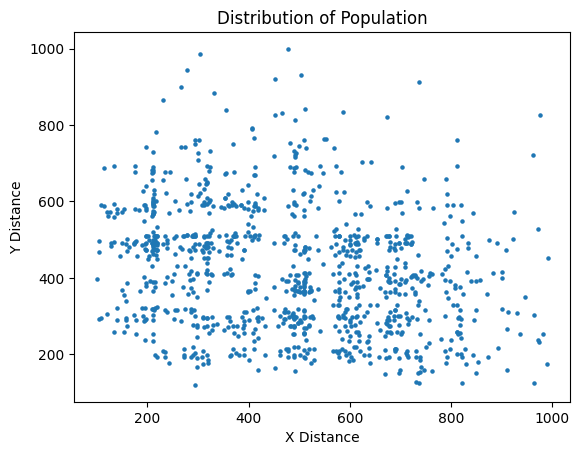

Total data points: 1014


In [2]:
uploaded = files.upload()
data = pd.read_csv('data.csv')
np.random.seed(42)
plt.scatter(data['x'], data['y'], s=5)
plt.title('Distribution of Population')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.show()

total_data_points = len(data)
print(f"Total data points: {total_data_points}")

In [19]:
X = data[['x', 'y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.15, min_samples=5)
start_time = time.time()
labels = dbscan.fit_predict(X_scaled)
end_time = time.time()
print(f"Time for clustering: {end_time - start_time:.4f} seconds")

unique_labels = set(labels)

Time for clustering: 0.0056 seconds


In [14]:
def buffered_hull(points, buffer_distance=0.05):
    if len(points) < 3:
        return Polygon(points).buffer(buffer_distance)
    hull = ConvexHull(points)
    poly_points = points[hull.vertices]
    polygon = Polygon(poly_points)
    return polygon.buffer(buffer_distance)

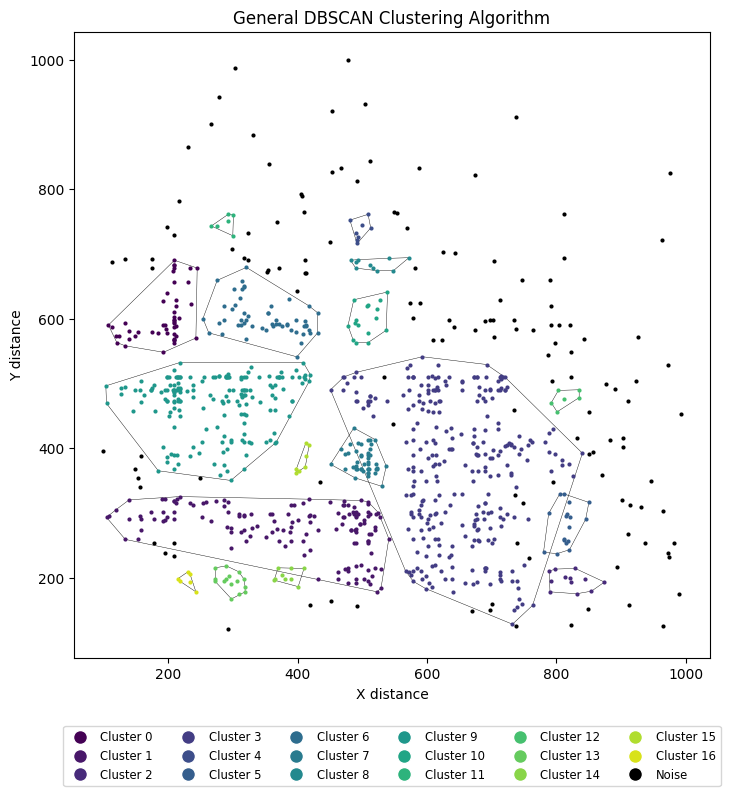

In [15]:
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8,8))
legend_elements = []
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    if k == -1:
        col = [0, 0, 0, 1]
        legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label='Noise'))
    else:
        legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=f'Cluster {k}'))
        if len(xy) > 2:
            hull_polygon = buffered_hull(xy)
            if hull_polygon.is_valid:
                x, y = hull_polygon.exterior.xy
                plt.plot(x, y, 'k-', linewidth=0.3)
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markersize=6, markeredgewidth=0)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=6)
plt.title('General DBSCAN Clustering Algorithm')
plt.xlabel('X distance')
plt.ylabel('Y distance')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [21]:
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))
max_lines = 6
print_data = [f'Cluster {cluster}: {count} data points' if cluster != -1 else f'Noise: {count} data points' for cluster, count in cluster_counts.items()]
formatted_output = [""] * max_lines
for i, line in enumerate(print_data):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<35}"

print("\nDATA POINTS PER CLUSTER:")
for line in formatted_output:
    print(line)


DATA POINTS PER CLUSTER:
Noise: 136 data points             Cluster 5: 17 data points          Cluster 11: 6 data points          
Cluster 0: 48 data points          Cluster 6: 54 data points          Cluster 12: 6 data points          
Cluster 1: 146 data points         Cluster 7: 46 data points          Cluster 13: 15 data points         
Cluster 2: 12 data points          Cluster 8: 10 data points          Cluster 14: 9 data points          
Cluster 3: 293 data points         Cluster 9: 179 data points         Cluster 15: 7 data points          
Cluster 4: 8 data points           Cluster 10: 16 data points         Cluster 16: 6 data points          
